## Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Uploading the dataset
accident_dataset = pd.read_csv("/content/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023.csv")

In [4]:
accident_dataset.head()

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023.0,010419171,1.0,1.0,3.0,2.0,20.0,4.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,E01030370
1,2023010419183,2023.0,010419183,2.0,1.0,1.0,1.0,25.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,E01001546
2,2023010419183,2023.0,010419183,3.0,2.0,2.0,2.0,38.0,7.0,3.0,0.0,0.0,2.0,0.0,0.0,9.0,-1.0,-1.0,-1
3,2023010419189,2023.0,010419189,1.0,1.0,1.0,1.0,50.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,5.0,E01002443
4,2023010419191,2023.0,010419191,2.0,1.0,1.0,1.0,34.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,E01004679


## Performing Exploratory Data Analysis and Data Preprocessing

In [ ]:
# Analysing the structure of the dataset
print("Dataset information:")
print(accident_dataset.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62674 entries, 0 to 62673
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   collision_index                     62674 non-null  object
 1   collision_year                      62674 non-null  int64 
 2   collision_reference                 62674 non-null  object
 3   vehicle_reference                   62674 non-null  int64 
 4   casualty_reference                  62674 non-null  int64 
 5   casualty_class                      62674 non-null  int64 
 6   sex_of_casualty                     62674 non-null  int64 
 7   age_of_casualty                     62674 non-null  int64 
 8   age_band_of_casualty                62674 non-null  int64 
 9   casualty_severity                   62674 non-null  int64 
 10  pedestrian_location                 62674 non-null  int64 
 11  pedestrian_movement              

In [ ]:
# Determining Statistical Information related to the dataset
print("\nDescriptive statistics for numerical columns:")
accident_dataset.describe().T


Descriptive statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
collision_year,62674.0,2023.000000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
vehicle_reference,62674.0,1.467562,4.849047,1.0,1.0,1.0,2.0,992.0
casualty_reference,62674.0,1.374972,1.551044,1.0,1.0,1.0,1.0,70.0
casualty_class,62674.0,1.491177,0.737688,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,62674.0,1.358107,0.548781,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,62674.0,36.953697,19.805649,-1.0,22.0,34.0,51.0,102.0
age_band_of_casualty,62674.0,6.315410,2.491679,-1.0,5.0,6.0,8.0,11.0
casualty_severity,62674.0,2.785046,0.438231,1.0,3.0,3.0,3.0,3.0
pedestrian_location,62674.0,0.808709,2.208673,-1.0,0.0,0.0,0.0,10.0
pedestrian_movement,62674.0,0.663369,2.041672,0.0,0.0,0.0,0.0,9.0


In [ ]:
# Checking Missing values
print("\nMissing values in the dataset:")
print(accident_dataset.isnull().sum())


Missing values in the dataset:
collision_index                       0
collision_year                        0
collision_reference                   0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64


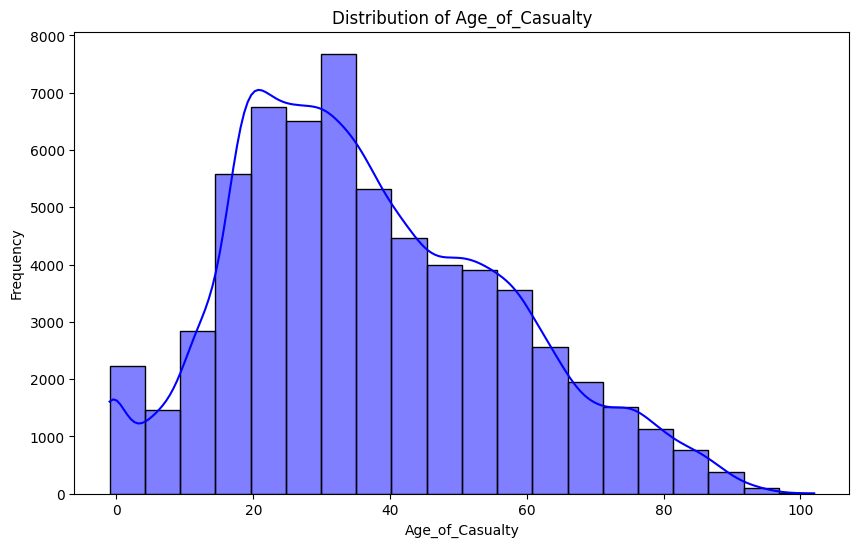

In [ ]:
# Creating a graph for analysing istribution of Age_of_Casualty
plt.figure(figsize=(10, 6))
sns.histplot(accident_dataset['age_of_casualty'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age_of_Casualty')
plt.xlabel('Age_of_Casualty')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-df1e97d9d3c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='casualty_severity', data=accident_dataset, palette='Set2')


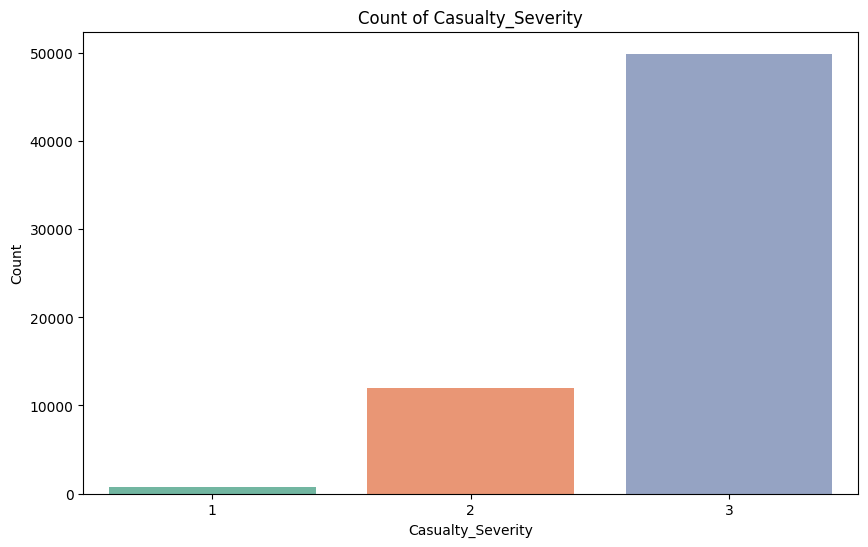

In [ ]:
# Creating graph for analysing the Count of Casualty_Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='casualty_severity', data=accident_dataset, palette='Set2')
plt.title('Count of Casualty_Severity')
plt.xlabel('Casualty_Severity')
plt.ylabel('Count')
plt.show()

In [ ]:
scaler = StandardScaler()
accident_dataset['age_of_casualty'] = scaler.fit_transform(accident_dataset[['age_of_casualty']])

## Splitting the Data set into Training and Testing Set

In [ ]:
X = accident_dataset.drop(columns=['casualty_class', 'lsoa_of_casualty','collision_index','collision_reference'])
y = accident_dataset['casualty_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Developing Random Forest and Logistric Regression Model

In [ ]:
# Creating a RandomForest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Creating a Logistric Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

## Evaluating the Models

In [ ]:
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, rf_pred))

Random Forest Classifier Accuracy: 0.9873155165536498
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      8167
           2       0.98      0.95      0.97      2477
           3       1.00      1.00      1.00      1891

    accuracy                           0.99     12535
   macro avg       0.99      0.98      0.99     12535
weighted avg       0.99      0.99      0.99     12535



In [ ]:
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("\nLogistic Regression Accuracy:", log_reg_accuracy)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))


Logistic Regression Accuracy: 0.9778220981252493
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98      8167
           2       0.99      0.90      0.94      2477
           3       1.00      1.00      1.00      1891

    accuracy                           0.98     12535
   macro avg       0.99      0.97      0.97     12535
weighted avg       0.98      0.98      0.98     12535

